In [1]:
import pandas as pd
import math
import numpy as np

### Total no. of artifacts in dataset

In [2]:
artifacts = pd.read_csv('training.csv')
print("Total no. of artifacts:", len(artifacts))
artifacts.head()

Total no. of artifacts: 96026


,artifact,storage_path,height,weight,key,age
0,pc_1583438052-nxew87bcv0_1591122011044_100_000.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260
1,pc_1583438052-nxew87bcv0_1591122011044_100_004.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260
2,pc_1583438052-nxew87bcv0_1591122011044_100_005.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260
3,pc_1583438052-nxew87bcv0_1591122011044_100_006.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260
4,pc_1583438052-nxew87bcv0_1591122011044_100_007.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260


In [3]:
## function to convert the days into age
def age(row):
    in_years= row['age']/365
    return round(in_years)

In [4]:
#adding the Years column into dataframe
artifacts['Years'] = artifacts.apply(age,axis=1)
artifacts.head()

,artifact,storage_path,height,weight,key,age,Years
0,pc_1583438052-nxew87bcv0_1591122011044_100_000.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3
1,pc_1583438052-nxew87bcv0_1591122011044_100_004.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3
2,pc_1583438052-nxew87bcv0_1591122011044_100_005.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3
3,pc_1583438052-nxew87bcv0_1591122011044_100_006.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3
4,pc_1583438052-nxew87bcv0_1591122011044_100_007.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3


In [5]:
def extract_qrcode(row):
    qrcode = row['storage_path'].split('/')[1]
    return qrcode

### Total no. of children in the dataset

In [6]:
artifacts['qrcode'] = artifacts.apply(extract_qrcode,axis=1)
scans = artifacts.drop_duplicates(subset='qrcode',keep ='first')
print("Total no. of children:", len(scans))
scans.head()

Total no. of children: 4858


,artifact,storage_path,height,weight,key,age,Years,qrcode
0,pc_1583438052-nxew87bcv0_1591122011044_100_000.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.30,100,1260,3,1583438052-nxew87bcv0
11,pc_1583438084-zkafuhr4xx_1591122031563_100_000.p,qrcode/1583438084-zkafuhr4xx/measure/159112203...,104.4,14.80,100,1283,4,1583438084-zkafuhr4xx
24,pc_1583438117-71v1y4z0gd_1592711198959_100_000.p,qrcode/1583438117-71v1y4z0gd/measure/159271119...,104.1,14.75,100,1398,4,1583438117-71v1y4z0gd
33,pc_1583438117-spfyeecneo_1591122016705_100_000.p,qrcode/1583438117-spfyeecneo/measure/159112201...,98.3,12.55,100,1640,4,1583438117-spfyeecneo
48,pc_1583438127-xt6z0e0tsu_1591122024547_100_000.p,qrcode/1583438127-xt6z0e0tsu/measure/159112202...,89.7,11.50,100,140,0,1583438127-xt6z0e0tsu


4     974
3     895
0     889
1     785
2     712
5     587
50     15
6       1
Name: Years, dtype: int64


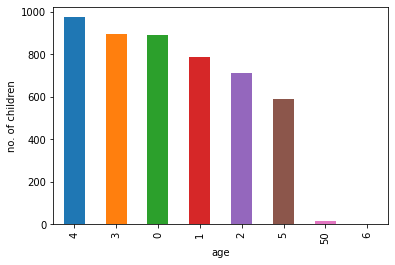

In [8]:
age_ax = scans['Years'].value_counts().plot(kind='bar')
age_ax.set_xlabel('age')
age_ax.set_ylabel('no. of children')
print(scans['Years'].value_counts())

101    39059
100    24872
102    23301
202     6378
201     1292
200     1124
Name: key, dtype: int64


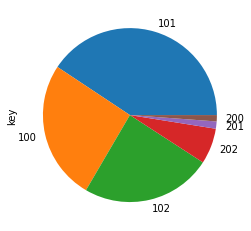

In [9]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['key'].value_counts())
artifacts['key'].value_counts().plot(kind='pie')

### Distribution of height, weight and age against each other

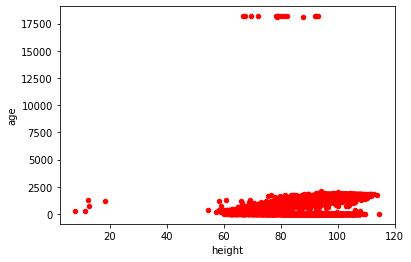

In [11]:
#distribution of height against age
heightvsage = scans.plot.scatter(x='height',
                      y='age',
                      c='red')

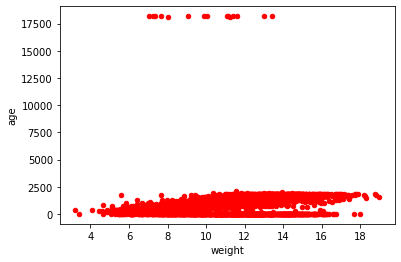

In [12]:
#distribution of weight against age
weightvsage = scans.plot.scatter(x='weight',
                      y='age',
                      c='red')

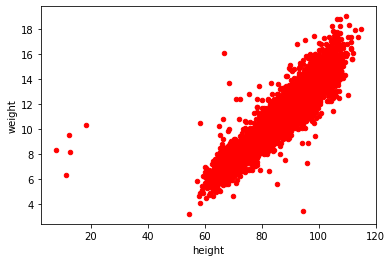

In [13]:
## distribution of height against weight
weightvsheight = scans.plot.scatter(x='height',
                      y='weight',
                      c='red')